# INSTALL DEPENDENCIES

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import cv2

/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


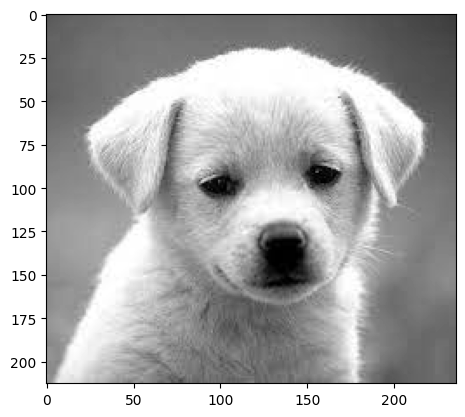

In [2]:
grayImg = cv2.imread(r'../../Downloads/puppy.jpeg', cv2.IMREAD_GRAYSCALE)
j_binary_img = cv2.imread(r'../../Downloads/j.png')
plt.imshow(grayImg, cmap='gray')

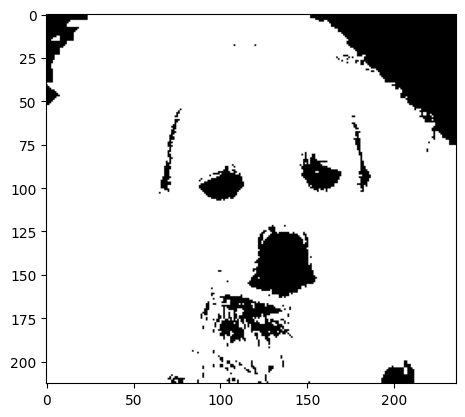

In [3]:
th = 100
binary_img = (grayImg > th) * 255

plt.imshow(binary_img, cmap='gray')

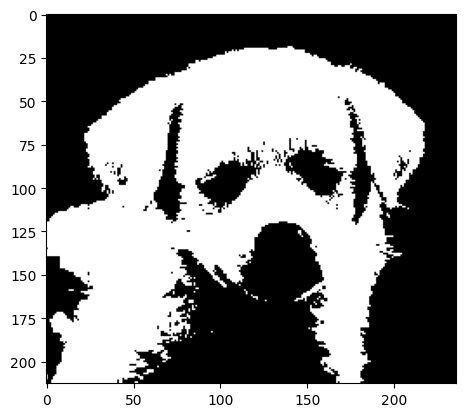

In [4]:
th = 150
binary_img = grayImg > th

plt.imshow(binary_img, cmap='gray')

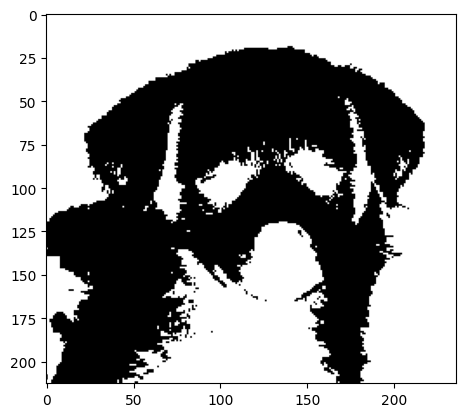

In [5]:
th = 150
binary_img = (grayImg > th) * 255

plt.imshow(~(binary_img), cmap='gray')

In [6]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
K_r

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
K_e

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [8]:
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
K_c

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [9]:
D_r = cv2.dilate(j_binary_img, K_r)
D_e = cv2.dilate(j_binary_img, K_e)
D_c = cv2.dilate(j_binary_img, K_c)

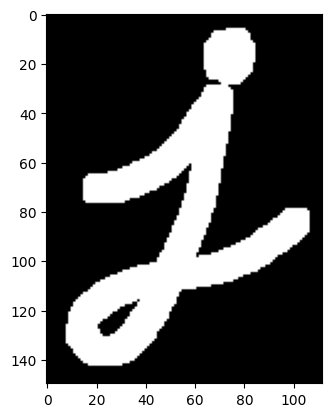

In [10]:
plt.imshow(D_r, cmap='gray')

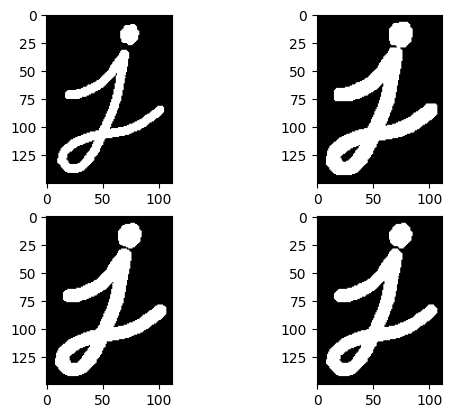

In [11]:
plt.subplot(221)
plt.imshow(j_binary_img, cmap='gray')
plt.subplot(222)
plt.imshow(D_r, cmap='gray')
plt.subplot(223)
plt.imshow(D_e, cmap='gray')
plt.subplot(224)
plt.imshow(D_c, cmap='gray')

In [12]:
print(np.sum((D_r-D_c)**2))

1419


In [13]:
print(np.sum((D_r-D_e)**2))

912


In [14]:
print(np.sum((D_e-D_c)**2))

507


In [15]:
im_bool = np.array(j_binary_img[:,:,0], dtype=np.bool_)

In [16]:
im_bool.dtype

dtype('bool')

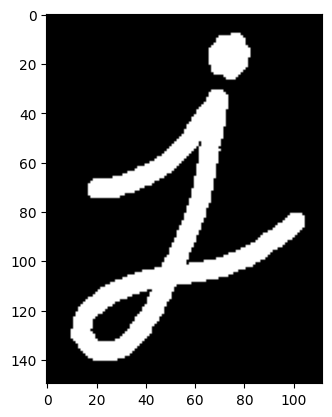

In [17]:
plt.imshow(im_bool, cmap='gray')

In [18]:
N = np.random.rand(j_binary_img.shape[0], j_binary_img.shape[1])

In [19]:
N

array([[0.575365  , 0.11617073, 0.20349894, ..., 0.04784718, 0.90591435,
        0.63654857],
       [0.28070464, 0.01763183, 0.41159875, ..., 0.74856484, 0.61551382,
        0.18597   ],
       [0.06033964, 0.68844495, 0.60968598, ..., 0.470397  , 0.25744541,
        0.8287484 ],
       ...,
       [0.49492824, 0.36025185, 0.63994083, ..., 0.02071841, 0.68628358,
        0.50825186],
       [0.7041443 , 0.44936906, 0.52495931, ..., 0.41225   , 0.76932666,
        0.279536  ],
       [0.39493389, 0.32627324, 0.4529072 , ..., 0.84997669, 0.2237792 ,
        0.93601444]])

In [20]:
N_img = N>0.98 

In [21]:
N_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

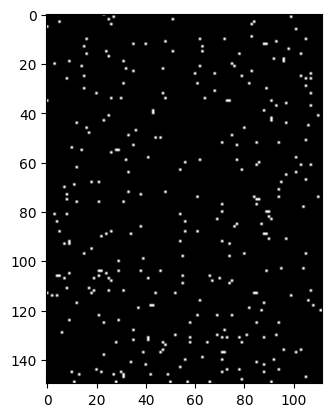

In [22]:
plt.imshow(N_img, cmap='gray')

In [23]:
j_binary_img.dtype

dtype('uint8')

In [24]:
im_bool.dtype

dtype('bool')

In [25]:
N_img_binary =  (N_img | im_bool)*255
N_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [26]:
N_img_binary =  (N_img | im_bool)*255
N_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

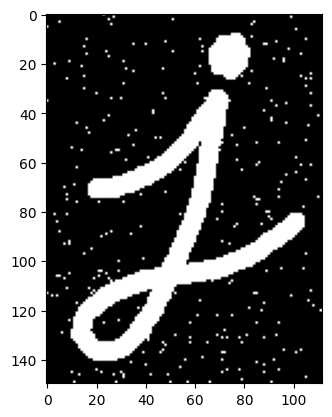

In [27]:
plt.imshow(N_img_binary, cmap='gray')

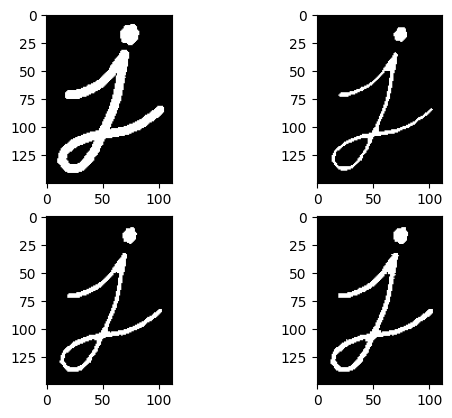

In [33]:
E_r = cv2.erode(np.float32(N_img_binary), K_r)
E_e = cv2.erode(np.float32(N_img_binary), K_e)
E_c = cv2.erode(np.float32(N_img_binary), K_c)

plt.subplot(221)
plt.imshow(j_binary_img, cmap='gray')
plt.subplot(222)
plt.imshow(E_r, cmap='gray')
plt.subplot(223)
plt.imshow(E_e, cmap='gray')
plt.subplot(224)
plt.imshow(E_c, cmap='gray')

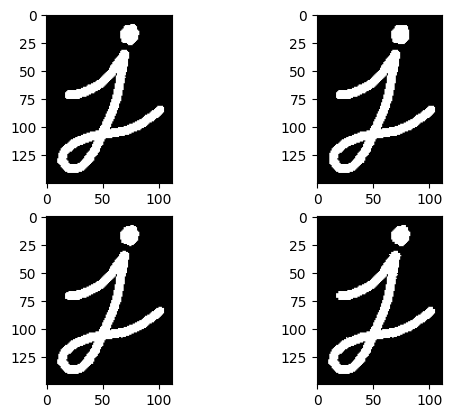

In [37]:
D_r = cv2.dilate(E_r, K_r)
D_e = cv2.dilate(E_e, K_e)
D_c = cv2.dilate(E_c, K_c)

plt.subplot(221)
plt.imshow(j_binary_img, cmap='gray')
plt.subplot(222)
plt.imshow(D_r, cmap='gray')
plt.subplot(223)
plt.imshow(D_e, cmap='gray')
plt.subplot(224)
plt.imshow(D_c, cmap='gray')

In [38]:
O_r = cv2.morphologyEx(np.float32(N_img_binary), cv2.MORPH_OPEN, K_r)

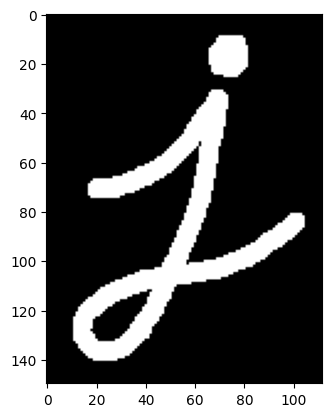

In [39]:
plt.imshow(O_r, cmap='gray')